In [25]:
from PIL import Image
from tqdm import tqdm
import os
import zipfile


In [26]:
SPLIT_SIZE_IMAGE = 512
IMAGE_PATH = "output/"
TRAIN_PATH = "dataset_landcover/train/"
TEST_PATH = "dataset_landcover/test/"
PREPARE_DATASET = False

In [27]:
if PREPARE_DATASET: 
    !curl -o landcover.ai.v1.zip https://landcover.ai.linuxpolska.com/download/landcover.ai.v1.zip

In [28]:
if PREPARE_DATASET: 
    # Chemin du fichier ZIP que vous avez téléchargé
    zip_file_path = "landcover.ai.v1.zip"

    # Chemin du répertoire où vous souhaitez extraire les fichiers
    extracted_folder_path = "landcover"

    # Fonction pour décompresser le fichier ZIP
    def unzip_file(zip_path, extract_path):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)

    # Appel de la fonction pour décompresser le fichier
    unzip_file(zip_file_path, extracted_folder_path)

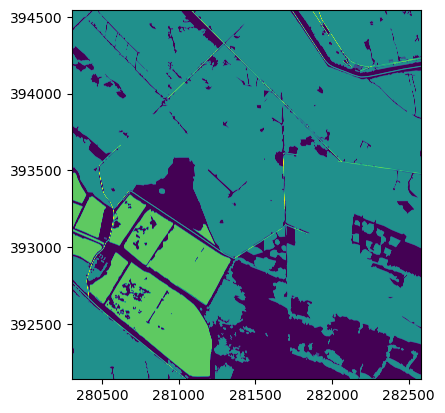

<Axes: >

In [29]:
import rasterio
from rasterio.plot import show
fp = "landcover/masks/M-33-20-D-c-4-2.tif"
img = rasterio.open(fp)
show(img)

In [30]:
if PREPARE_DATASET: 
    %run landcover/split.py

In [31]:
def merge_image(img1_path, img2_path, new_image_path):
    image1 = Image.open(img1_path)
    image2 = Image.open(img2_path)
    
    #resize, first image
    image1 = image1.resize((SPLIT_SIZE_IMAGE, SPLIT_SIZE_IMAGE))
    image1_size = image1.size
    image2_size = image2.size
    new_image = Image.new('RGB',(2*image1_size[0], image1_size[1]), (250,250,250))
    new_image.paste(image1,(0,0))
    new_image.paste(image2,(image1_size[0],0))
    new_image.save(new_image_path,"JPEG")

In [32]:
def create_image(from_image, to_image, new_image_name):
        merge_image(
            from_image,
            to_image,
            TRAIN_PATH + new_image_name
        )

In [33]:
if PREPARE_DATASET: 
    os.makedirs(TRAIN_PATH)
    os.makedirs(TEST_PATH)

In [34]:
if PREPARE_DATASET: 
    file_train = open("landcover/train.txt", 'r')
    lines = file_train.readlines()

    # Strips the newline character
    for line in tqdm(lines):
        merge_image(
            IMAGE_PATH + line.strip() + '.jpg',
            IMAGE_PATH + line.strip() + '_m.png',
            TRAIN_PATH + line.strip() + ".png"
        )

In [35]:
if PREPARE_DATASET: 
    file_train = open("landcover/val.txt", 'r')
    lines = file_train.readlines()

    # Strips the newline character
    for line in tqdm(lines):
        merge_image(
            IMAGE_PATH + line.strip() + '.jpg',
            IMAGE_PATH + line.strip() + '_m.png',
            TRAIN_PATH + line.strip() + ".png"
        )

In [36]:
if PREPARE_DATASET: 
    file_train = open("landcover/test.txt", 'r')
    lines = file_train.readlines()

    # Strips the newline character
    for line in tqdm(lines):
        merge_image(
            IMAGE_PATH + line.strip() + '.jpg',
            IMAGE_PATH + line.strip() + '_m.png',
            TEST_PATH + line.strip() + ".png"
        )